Columns in dataset:
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percen

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.399e+03, tolerance: 5.108e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.301e+03, tolerance: 5.108e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

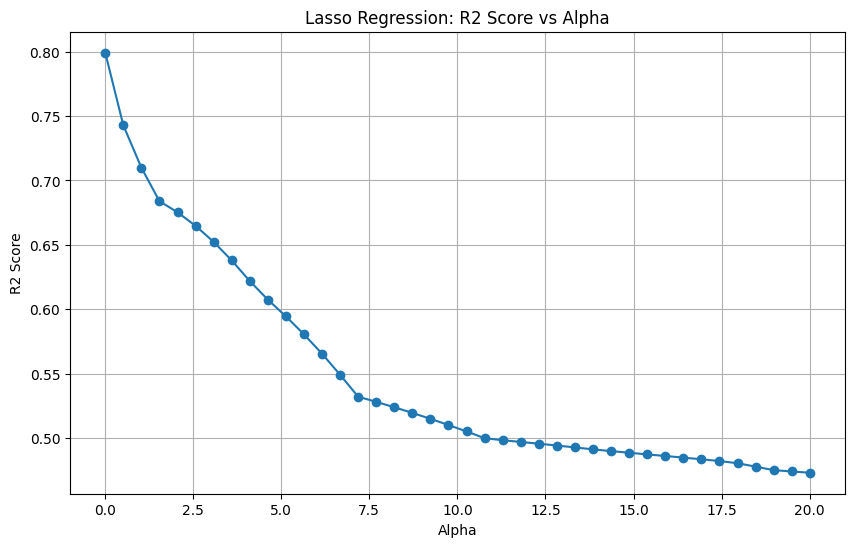

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.179e+03, tolerance: 3.940e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.137e+03, tolerance: 4.056e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4


Best alpha from cross-validation: 0.01
Best CV R2 score: 0.7529

Final Lasso model R2 score on test set: 0.7991

Cross-validated R2 scores (Linear Regression): [0.08847103 0.66466665 0.73005491 0.68520989 0.66679159]
Mean CV R2 score: 0.5670


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.399e+03, tolerance: 5.108e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Regularized Linear Regression Project
# U.S. County-Level Socio-Demographic and Health Data (2018–2019)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# -------------------------------------
# 1. Load and inspect dataset
# -------------------------------------
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
df = pd.read_csv(url)

print("Columns in dataset:")
print(df.columns.tolist())

# -------------------------------------
# 2. Define target variable
# -------------------------------------
# We are focusing on obesity prevalence as a key health-related outcome

target = 'Obesity_prevalence'

if target not in df.columns:
    raise ValueError(f"Target column '{target}' does not exist in the dataset. Please choose a valid target.")

# -------------------------------------
# 3. Data cleaning and preprocessing
# -------------------------------------

# Drop irrelevant or identifier columns
cols_to_drop = ['fips', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)

# Drop columns with more than 30% missing values
threshold = len(df) * 0.3
cols_before = df.shape[1]
df = df.loc[:, df.isnull().sum() <= threshold]
cols_after = df.shape[1]
print(f"\nDropped {cols_before - cols_after} columns with >30% missing values")

# Ensure target wasn't dropped accidentally
if target not in df.columns:
    raise ValueError(f"Target column '{target}' was dropped due to missing values or not found! Adjust threshold or target.")

# Remove columns that may leak target info (e.g., confidence intervals or related variables)
leakage_cols = [
    'Obesity_Upper 95% CI',
    'Obesity_Lower 95% CI',
    'anycondition_Upper 95% CI',
    'anycondition_Lower 95% CI',
    'anycondition_prevalence'
]
leakage_cols = [col for col in leakage_cols if col in df.columns]
df.drop(columns=leakage_cols, inplace=True)

# Fill remaining missing values in numeric columns with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# -------------------------------------
# 4. Prepare features and target
# -------------------------------------
X = df.drop(columns=[target])
y = df[target]

# -------------------------------------
# 5. Split data into training and testing sets
# -------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------------
# 6. Train baseline Linear Regression model
# -------------------------------------
print("\nTraining Linear Regression...")
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R2 score: {r2_lr:.4f}")

# -------------------------------------
# 7. Train and evaluate Lasso Regression over a range of alphas
# -------------------------------------
print("\nEvaluating Lasso Regression over multiple alpha values...")
alphas = np.linspace(0.01, 20, 40)
r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_lasso))

# -------------------------------------
# 8. Plot R2 scores vs alpha values
# -------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_scores, marker='o')
plt.title('Lasso Regression: R2 Score vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# -------------------------------------
# 9. Optimize Lasso using cross-validation
# -------------------------------------
print("\nOptimizing Lasso using cross-validation...")
param_grid = {'alpha': alphas}
grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_alpha = grid.best_params_['alpha']
print(f"Best alpha from cross-validation: {best_alpha:.2f}")
print(f"Best CV R2 score: {grid.best_score_:.4f}")

lasso_final = Lasso(alpha=best_alpha, max_iter=10000)
lasso_final.fit(X_train, y_train)

y_pred_final = lasso_final.predict(X_test)
r2_final = r2_score(y_test, y_pred_final)
print(f"\nFinal Lasso model R2 score on test set: {r2_final:.4f}")

# -------------------------------------
# 10. Cross-validation on Linear Regression for comparison
# -------------------------------------
print("\nRunning cross-validation on Linear Regression for comparison...")
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"Cross-validated R2 scores (Linear Regression): {cv_scores}")
print(f"Mean CV R2 score: {cv_scores.mean():.4f}")

